In [1]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
#(X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
y_train[0:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax', use_bias=False))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [5]:
# 資料前置處理
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


In [6]:
y_TrainOneHot.shape

(60000, 10)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

# Normalize
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255
#x_Train_norm = X_train_2D
#x_Test_norm = X_test_2D

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.7615 - acc: 0.8143 - val_loss: 0.3195 - val_acc: 0.9122
Epoch 2/10
 - 3s - loss: 0.2940 - acc: 0.9177 - val_loss: 0.2454 - val_acc: 0.9325
Epoch 3/10
 - 2s - loss: 0.2305 - acc: 0.9356 - val_loss: 0.2023 - val_acc: 0.9457
Epoch 4/10
 - 2s - loss: 0.1902 - acc: 0.9466 - val_loss: 0.1775 - val_acc: 0.9512
Epoch 5/10
 - 2s - loss: 0.1610 - acc: 0.9547 - val_loss: 0.1579 - val_acc: 0.9562
Epoch 6/10
 - 2s - loss: 0.1394 - acc: 0.9608 - val_loss: 0.1415 - val_acc: 0.9597
Epoch 7/10
 - 2s - loss: 0.1213 - acc: 0.9664 - val_loss: 0.1305 - val_acc: 0.9619
Epoch 8/10
 - 2s - loss: 0.1075 - acc: 0.9702 - val_loss: 0.1244 - val_acc: 0.9638
Epoch 9/10
 - 2s - loss: 0.0955 - acc: 0.9739 - val_loss: 0.1149 - val_acc: 0.9662
Epoch 10/10
 - 2s - loss: 0.0857 - acc: 0.9768 - val_loss: 0.1103 - val_acc: 0.9672
10000/10000 [==============================] - 1s 85us/step

	[Info] Accuracy of testing data = 97.0%


In [9]:
# 顯示訓練過程 
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

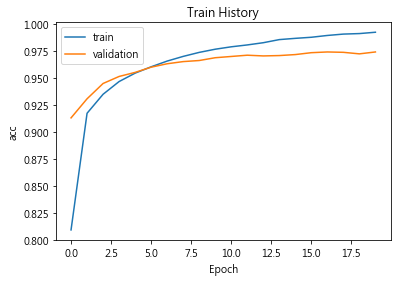

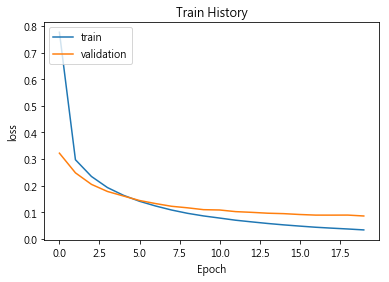

In [39]:
# 顯示訓練過程趨勢圖
# 準確率
show_train_history(train_history, 'acc', 'val_acc') 
# 損失函數
show_train_history(train_history, 'loss', 'val_loss')  

In [10]:
X = x_Test_norm
predictions = model.predict_classes(X)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])


prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [12]:
predictions = model.predict(X)
# get prediction result
print('prediction:', predictions[8])

prediction: [2.1058050e-04 6.4928527e-06 2.7373969e-03 4.7808226e-06 6.8232482e-03
 8.9155331e-02 9.0079767e-01 2.1317341e-07 2.5700175e-04 7.3222764e-06]


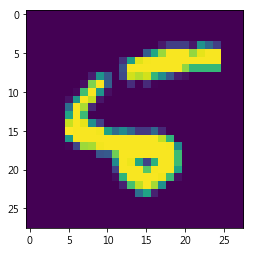

In [41]:
X2 = X_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [42]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)
print(confmat)

[[ 973    0    1    1    0    0    1    1    3    0]
 [   0 1124    4    0    0    1    2    0    4    0]
 [   4    3 1008    3    1    0    2    7    4    0]
 [   0    0    5  989    0    3    0    6    3    4]
 [   1    0    1    1  958    0    6    4    1   10]
 [   2    0    0   13    1  866    5    1    3    1]
 [   7    2    3    0    3    4  938    0    1    0]
 [   2    3   11    3    1    0    0 1002    1    5]
 [   5    1    2   11    3    3    1    6  940    2]
 [   3    5    0    8    9    2    1    7    4  970]]


In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2560      
Total params: 203,520
Trainable params: 203,520
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [46]:
from keras.models import model_from_json
json_string = model.to_json( ) 
with open("model.config", "w") as text_file:    
	text_file.write(json_string)


In [47]:
model.save_weights("model.weight")

In [48]:
model.save('model.h5')  

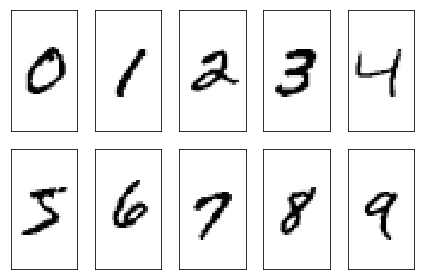

In [49]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
import os
from keras.datasets import mnist
#data_folder = os.path.join(os.getcwd(), "datasets/mnist.npz")
(X_train, y_train), (X_test, y_test) = mnist.load_data() #path=data_folder)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()
